In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Import the dataset

In [2]:
grade_df = pd.read_csv('student-por.csv')
grade_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


# Choosing Response(Between G1,G2 and G3)


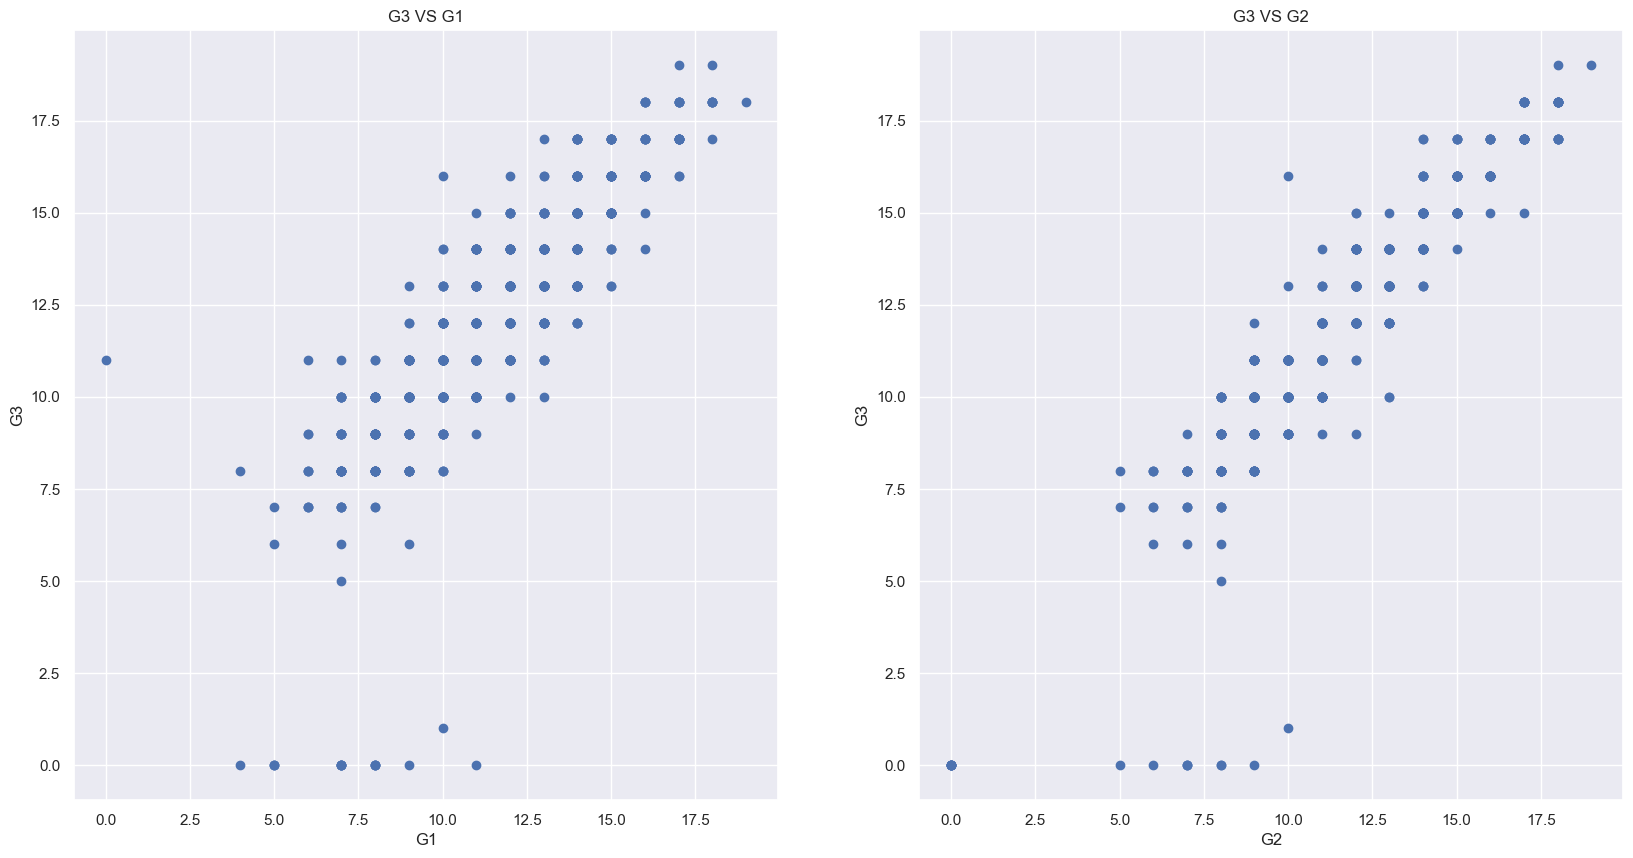

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
axes[0].scatter(data=grade_df, x='G1', y='G3')
axes[0].set_title('G3 VS G1')
axes[0].set_xlabel('G1')
axes[0].set_ylabel('G3')
axes[1].scatter(data=grade_df, x='G2', y='G3')
axes[1].set_title('G3 VS G2')
axes[1].set_xlabel('G2')
axes[1].set_ylabel('G3')
plt.show()

In [4]:
grade_df.drop(columns=['G1','G2'],inplace=True)
grade_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,yes,no,5,4,2,1,2,5,4,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,yes,no,4,3,4,1,1,1,4,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,no,no,1,1,1,1,1,5,6,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,6,10


### We chose G3 as our response and dropped G1 and G2 since we do not need to use them to predict G3.

### Reason: From the scatterplot, we can assume that students usually have roughly the same grade in the first and second periods and the final grade since points are scattered around the line y=x.  

# Data Cleaning 

In [5]:
grade_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,649,2,GP,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,649,2,F,383,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,649.0,NaN,NaN,NaN,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
address,649,2,U,452,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,649,2,GT3,457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus,649,2,T,569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,649.0,NaN,NaN,NaN,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,NaN,NaN,NaN,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
Mjob,649,5,other,258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fjob,649,5,other,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking for NULL values and duplicates

In [6]:
grade_df.info() ##no null values
grade_df.drop_duplicates() ##no duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,yes,no,5,4,2,1,2,5,4,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,yes,no,4,3,4,1,1,1,4,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,no,no,1,1,1,1,1,5,6,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,6,10


### From dataset info, failures, school, sex, address, famsize, Pstatus, Medu, Fedu, studytime, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, and health are supposed to be categorical variables but are represented as numerical/binary variables. 

### We have decided to use One Hot encoding to encode all categorical variables. 

In [7]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
grade_cat = grade_df[['failures','school','sex','address','famsize','Pstatus','Medu','Fedu','Fjob','Mjob','reason','guardian','studytime','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','famrel','freetime','goout','Dalc','Walc','health']]
ohe.fit(grade_cat)
grade_cat_ohe = pd.DataFrame(ohe.transform(grade_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(grade_cat.columns)) #change ohe.get_feature_names_out to ohe.get_feature_names if not working

# Check the encoded variables
grade_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 91 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   failures_0         649 non-null    float64
 1   failures_1         649 non-null    float64
 2   failures_2         649 non-null    float64
 3   failures_3         649 non-null    float64
 4   school_GP          649 non-null    float64
 5   school_MS          649 non-null    float64
 6   sex_F              649 non-null    float64
 7   sex_M              649 non-null    float64
 8   address_R          649 non-null    float64
 9   address_U          649 non-null    float64
 10  famsize_GT3        649 non-null    float64
 11  famsize_LE3        649 non-null    float64
 12  Pstatus_A          649 non-null    float64
 13  Pstatus_T          649 non-null    float64
 14  Medu_0             649 non-null    float64
 15  Medu_1             649 non-null    float64
 16  Medu_2             649 non

In [8]:
#combining numeric fratures with OHE categorical feature
grade_num=grade_df[['age','absences']]
grade_res=grade_df['G3']
grade_ohe=pd.concat([grade_num,grade_cat_ohe,grade_res],
                   sort=False,axis=1).reindex(index=grade_num.index)

grade_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 94 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                649 non-null    int64  
 1   absences           649 non-null    int64  
 2   failures_0         649 non-null    float64
 3   failures_1         649 non-null    float64
 4   failures_2         649 non-null    float64
 5   failures_3         649 non-null    float64
 6   school_GP          649 non-null    float64
 7   school_MS          649 non-null    float64
 8   sex_F              649 non-null    float64
 9   sex_M              649 non-null    float64
 10  address_R          649 non-null    float64
 11  address_U          649 non-null    float64
 12  famsize_GT3        649 non-null    float64
 13  famsize_LE3        649 non-null    float64
 14  Pstatus_A          649 non-null    float64
 15  Pstatus_T          649 non-null    float64
 16  Medu_0             649 non

# Identifying top features affecting G3. (Feature importance/Feature selection)

[0.02480274 0.02700296 0.01285559 0.00741535 0.00191804 0.00159898
 0.01027256 0.01069061 0.01372568 0.01475893 0.01261271 0.0116719
 0.01421456 0.01345189 0.00854589 0.0081774  0.00091666 0.00938145
 0.01391189 0.0135217  0.01207127 0.00145029 0.01208773 0.01596231
 0.01281654 0.01161421 0.00587735 0.00339233 0.01688856 0.01468523
 0.00491875 0.01126537 0.00668998 0.01492769 0.01151165 0.00676574
 0.01670693 0.01428418 0.00846224 0.01235836 0.01327837 0.01400083
 0.00471659 0.01383408 0.01472379 0.01142253 0.0055563  0.00678209
 0.00657947 0.01605924 0.01582702 0.00508436 0.00497647 0.01378582
 0.01421074 0.01029345 0.01139703 0.00603047 0.00657088 0.01070896
 0.0111123  0.01448251 0.01528417 0.00314842 0.00371978 0.01074783
 0.0176602  0.01371    0.0069897  0.01225757 0.01592249 0.0151597
 0.00818019 0.00688083 0.01566303 0.0158167  0.01337609 0.01241483
 0.01236976 0.00920871 0.00450346 0.00307119 0.00293377 0.01441192
 0.01406612 0.01370657 0.00941433 0.00494638 0.01138447 0.010211

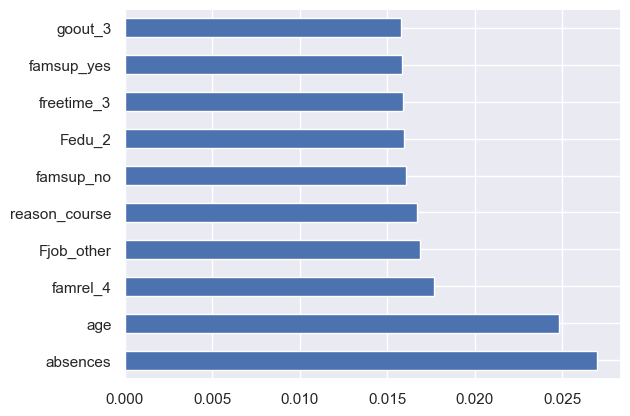

In [9]:

X = grade_ohe.iloc[:,0:92]  #independent columns
y = grade_ohe.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### From the Extra Trees Classifier algorithm, the top features are absences, age, famrel, Fjob, and freetime.

Extra Trees Classifier constructs multiple decision tree, and the top feature selection is selected based on number of times a particular feature appears in the decision tress. 

### Since Extra Trees Classifier does not consider the correlation between the response and predictor. As a result, it is likely that some selected features have a high/low correlation with the response variable, which can affect the performance of the model.

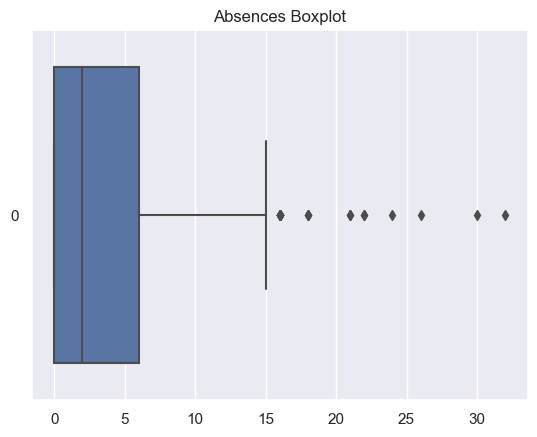

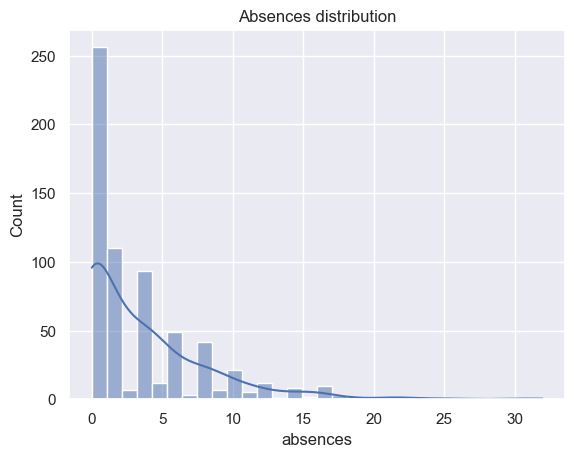

In [10]:
sb.boxplot(data=grade_df['absences'], orient = "h")
plt.title('Absences Boxplot')
plt.show()
sb.histplot(grade_df['absences'], bins=30, kde=True)
plt.title('Absences distribution')
plt.show()

In [11]:
absence_df=grade_df[['absences','G3']]
absence_df.corr()

,absences,G3
absences,1.000000,-0.091379
G3,-0.091379,1.000000


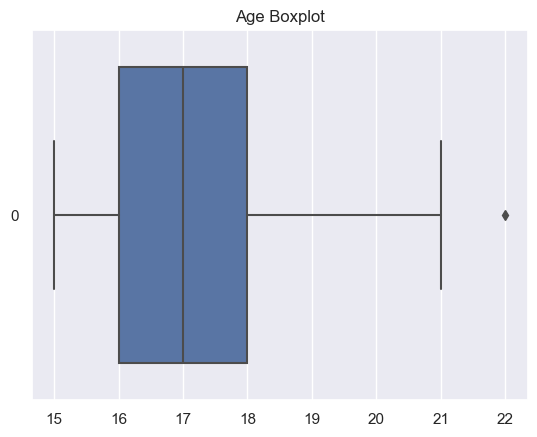

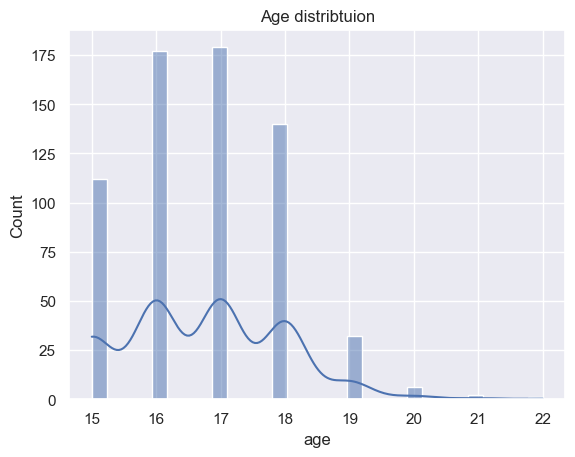

In [12]:
sb.boxplot(data=grade_df['age'], orient = "h")
plt.title('Age Boxplot')
plt.show()
age_df=grade_df[['age','G3']]
sb.histplot(grade_df['age'], bins=30, kde=True)
plt.title('Age distribtuion')
plt.show()

In [13]:
age_df=grade_df[['age','G3']]
age_df.corr()

,age,G3
age,1.000000,-0.106505
G3,-0.106505,1.000000


In [14]:
grade_ohe.corr()

,age,absences,failures_0,failures_1,failures_2,failures_3,school_GP,school_MS,sex_F,sex_M,...,Walc_2,Walc_3,Walc_4,Walc_5,health_1,health_2,health_3,health_4,health_5,G3
age,1.000000,0.149998,-0.324608,0.211814,0.196679,0.144476,-0.087170,0.087170,0.043662,-0.043662,...,0.010110,0.031608,0.052955,0.027458,-0.025566,-0.004085,0.047386,0.039508,-0.047668,-0.106505
absences,0.149998,1.000000,-0.155590,0.153002,0.005246,0.054359,0.163933,-0.163933,-0.021336,0.021336,...,0.003215,0.024704,0.083507,0.093294,0.048694,-0.017820,0.011178,-0.040346,-0.000826,-0.091379
failures_0,-0.324608,-0.155590,1.000000,-0.814697,-0.372515,-0.347907,0.162840,-0.162840,0.043510,-0.043510,...,0.061884,-0.027594,-0.057556,-0.034715,0.035411,-0.026007,0.022866,0.030263,-0.049441,0.438403
failures_1,0.211814,0.153002,-0.814697,1.000000,-0.055280,-0.051628,-0.173328,0.173328,0.006972,-0.006972,...,-0.013889,0.026319,0.067302,-0.036245,-0.038910,0.054794,-0.004731,-0.048661,0.032108,-0.351472
failures_2,0.196679,0.005246,-0.372515,-0.055280,1.000000,-0.023607,-0.008934,0.008934,-0.049343,0.049343,...,-0.040024,-0.024531,-0.004224,0.073953,-0.035042,-0.028203,-0.026716,0.035682,0.038034,-0.152354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
health_2,-0.004085,-0.017820,-0.026007,0.054794,-0.028203,-0.022263,-0.048122,0.048122,0.038242,-0.038242,...,0.010929,0.068081,-0.020251,-0.063576,-0.148301,1.000000,-0.179622,-0.165136,-0.291608,0.032779
health_3,0.047386,0.011178,0.022866,-0.004731,-0.026716,-0.018207,0.017937,-0.017937,0.014526,-0.014526,...,-0.043321,-0.009365,-0.041671,0.037062,-0.195005,-0.179622,1.000000,-0.217142,-0.383443,-0.010132
health_4,0.039508,-0.040346,0.030263,-0.048661,0.035682,-0.009390,0.022653,-0.022653,0.010641,-0.010641,...,-0.009436,-0.020985,-0.005800,0.024617,-0.179279,-0.165136,-0.217142,1.000000,-0.352519,0.055300
health_5,-0.047668,-0.000826,-0.049441,0.032108,0.038034,0.013711,0.031318,-0.031318,-0.122056,0.122056,...,0.018415,0.007835,0.089476,0.021641,-0.316581,-0.291608,-0.383443,-0.352519,1.000000,-0.106593


In [15]:
def outlinerange(data, col):
    Q3 = data[col].quantile(0.75)
    Q1 = data[col].quantile(0.25)
    IQR = Q3-Q1
    MIN = Q1 - (1.5*(IQR))
    MAX = Q3 + (1.5*(IQR))
    print(f"minimum for {col}: {MIN}")
    print(f"maximum for {col}: {MAX}")
    
outlinerange(absence_df, 'absences')
outlinerange(age_df, 'age')

minimum for absences: -9.0
maximum for absences: 15.0
minimum for age: 13.0
maximum for age: 21.0


### From further analysis, absences and age does not have a strong effect on the grade due to their low correlation